# Decision Tree Classifier

Decision Trees is a non-linear model that can be used for regression and classification. The structure of a decision tree consists of root nodes, leaf nodes and branches. These algorithms are simple to interpret and do not require feature scaling. 


# Training Process

Decision Trees make predictions by stratifying or segmenting at each split using a criteria. It uses a top-down greedy approach called recursive binary splitting. 

The first split (root node) is the most influential at predicting the target variable. The model considers all predictors and all possible values for the splitting point for each predictor. For classification problems the tree makes splits by finding the cut points that minimize the misclassification rate. For regression problems, the tree splits based on minimizing the residual standard error.

The model continues to make splits until a criterion is met. For example, the tree continues until no segments contain more than 10 observations. For regression, the mean predicted response in the terminal node is the final output. For classification, we detect the most frequently occurring class in the selected region.  For classification tress the Gini Index and Entropy are better to evaluate node purity. Values closer to zero imply that all training instances belong to the same class. When a region is completely pure, it cannot split further.

If left unconstrained, the model tends to learn the training data quite well (overfitting). However various hyperparameters can be tweaked to restrict the model's freedom and control overfitting.


# Decision Tree Hyperparameters

Increasing min and reducing max will apply regularization. 

- min_samples_split: The minumum number of samples in a node

- min_samples_leaf:  The minumum number of samples in a leaf

- max_leaf_nodes: maximum number of leaf nodes

- max_features: maximum number of features for splitting at each   node.




# Decision Trees Pros and Cons


**Pros**

- Easy to interpret

- Allows us to determine feature importance. This could be used as a method conduct feature extraction.


**Cons**

- Sensitive to variation in training data

- Is prone to overfitting



# 1. Libraries

In [9]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [10]:
# Import Data
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# 2. Preprocessing

In [11]:
# Create subsets of input features and response variable.
X = dataset.iloc[:, :-1].values
y = dataset['Purchased'].values

# Training and Testing subsets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 911)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print('Standardized feature Mean:',  X_train.mean().round())
print('Standardized feature SD :',   X_train.std().round())

Standardized feature Mean: 0.0
Standardized feature SD : 1.0


# 3. Training

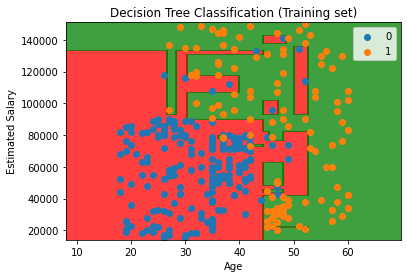

In [22]:
# Training the Decision Tree Classifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)

# Visualising the Training set results
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, dt.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], cmap = ListedColormap(('red', 'green'))(i), edgecolor = 'black',
            linewidth = 1,
            alpha = 0.75, label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# 3. Testing

In [12]:
# Predicting a new result using age 40 and salary 87000
print(dt.predict(sc.transform([[40,87000]])))
dt.predict_proba(sc.transform([[40,87000]]))

# Predicting the Test set results
y_pred = dt.predict(X_test)

# Classification Accuracy
print('Classification Accuracy :', accuracy_score(y_test, y_pred))

[0]
Classification Accuracy : 0.8375


# 4. K-Fold Cross Validation

In [6]:
# 10 fold cross validation
accuracies = cross_val_score(estimator = DecisionTreeClassifier(),
                             X = X,
                             y = y,
                             cv = 10,
                             scoring = 'accuracy')

# Cross validation accuracy and standard deviation
print(accuracies)
print("Accuracy: {:.3f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.3f} %".format(accuracies.std()*100))

[0.85  0.75  0.925 0.85  0.925 0.8   0.8   0.85  0.75  0.85 ]
Accuracy: 83.500 %
Standard Deviation: 5.831 %


# 5. Hyperparametric Tuning

In [8]:
# Grid Search CV
param_grid = [{
     'max_depth': [6, 10],
     'max_features': ['auto'],
     'min_samples_leaf': [3, 5],
     'min_samples_split': [4, 6]}]


# Configure GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid, cv=5,
                           scoring="accuracy",
                            n_jobs=-1)
# Initiate Search
grid_search.fit(X_train, y_train)

# Extract Tuned Parameters and Predictive Accuracy
tuned_params = grid_search.best_params_
tuned_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

# Print Results
print("Best Accuracy: {:.2f} %".format(grid_search.best_score_*100))
print("Best Parameters:", tuned_params)

Best Accuracy: 90.94 %
Best Parameters: {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 6}


In [14]:
# Randomized Search

# Hyperparameters
param_grid = {
        "max_depth": [6, 8, 10, 12, 14],
        "max_features": ['auto'],
        "min_samples_leaf": [2, 3, 4],
        "min_samples_split": [2, 3, 4, 5]}

# Randomized Search initialization
random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, n_iter=32,
                                        scoring="accuracy", cv=5,
                                        n_jobs=-1, random_state=911)
# Initiate Search
random_search.fit(X_train, y_train)

# Extract Tuned Parameters and Predictive Accuracy
tuned_params = random_search.best_params_
tuned_score = random_search.best_score_
best_estimator = random_search.best_estimator_

# Print Results
print("Best Accuracy: {:.2f} %".format(random_search.best_score_*100))
print("Best Parameters:", tuned_params)

Best Accuracy: 90.94 %
Best Parameters: {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 6}


# 6. Evaluation Metrics

In [25]:
# Confusion Matrix/AUC/Classification Report 

def evaluate_model(dt, X_test):
    
    y_pred = grid_search.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred, target_names=["NEGATIVE", "POSITIVE"])
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=np.arange(2) + 0.6, labels=["NEGATIVE", "POSITIVE"])
    plt.yticks(ticks=np.arange(2) + 0.6, labels=["NEGATIVE", "POSITIVE"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)
    
    
    # ROC/AUC Curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, c = 'green', linewidth = 3, alpha = 0.75)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()
    
    
    # Visualising the Testing Results
    X_set, y_set = sc.inverse_transform(X_test), y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                         np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
    plt.contourf(X1, X2, grid_search.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], cmap = ListedColormap(('red', 'green'))(i),edgecolor = 'black',
            linewidth = 1,
            alpha = 0.75, label = j)
    plt.title('Logistic Regression (Test set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

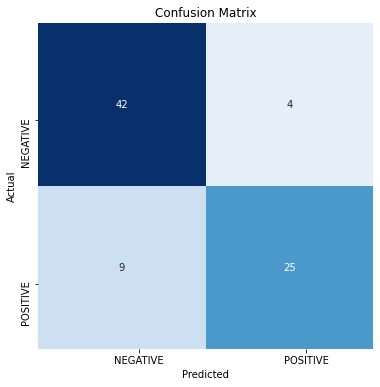

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.82      0.91      0.87        46
    POSITIVE       0.86      0.74      0.79        34

    accuracy                           0.84        80
   macro avg       0.84      0.82      0.83        80
weighted avg       0.84      0.84      0.84        80



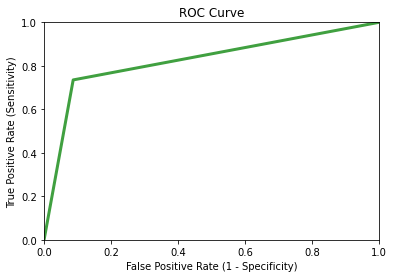

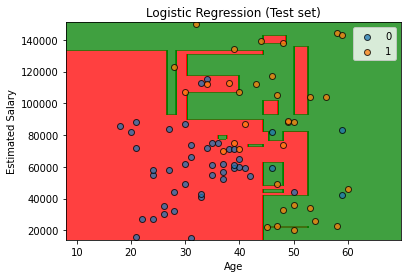

In [26]:
evaluate_model(grid_search, X_test)